In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emiglia-Romagna', 'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Svizzera Italiana', 'Toscana', 'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta", 'Veneto']

In [4]:
questions = df.columns.values

### get target (Regions column)

In [5]:
y = df[questions[1]]

### combine each row of responses into 1 cell titled 'Responses'

In [6]:
df['Responses'] = df[df.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

### get data ('Responses' column is the last column in df)

In [7]:
X = df[df.columns[-1]]

### divide X and y into test and train portions
#### play arround with test_size (percentage of data not included in training) and random_state (so specific results can be replicated)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=23)

### classify using naive Bayes

In [9]:
clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB()),
])

clf.fit(X_train, y_train)  
pred = clf.predict(X_test)

print('mean: ', np.mean(pred == y_test))


print('accuracy_score: ', accuracy_score(y_test, pred))

mean:  0.4166666666666667
accuracy_score:  0.4166666666666667


### classify using support vector machine

In [10]:
clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, random_state=42,
                                              max_iter=5, tol=None)),
])

clf.fit(X_train, y_train) 

pred = clf.predict(X_test)

print('mean: ', np.mean(pred == y_test))


print('accuracy_score: ', accuracy_score(y_test, pred))


mean:  0.9166666666666666
accuracy_score:  0.9166666666666666


In [11]:
pred = pd.Series(pred, name='predicted')
compare = pd.concat([pred,y_test.reset_index()], axis=1).drop('index', axis=1)

### compare results

In [12]:
compare

,predicted,A quale regione d'Italia appartieni?
0,Emiglia-Romagna,Emiglia-Romagna
1,Lombardia,Lombardia
2,Toscana,Toscana
3,Toscana,Toscana
4,Campania,Campania
5,Toscana,Toscana
6,Lombardia,Lombardia
7,Lazio,Lazio
8,Veneto,Veneto
9,Campania,Campania


# CROSS-VALIDATION STUFF

In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
import matplotlib.pyplot as plt

In [14]:
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


TRAIN: [ 0  2  3  4  6  7 10 11 12 13 14 15 17 18 19 22 23 25 26 27 28 29 30 31
 32 33 34 37 38 39 41 42 44 45 46 47 48 49 50 51 52 56 57 58 59 60 61 62
 63 64 65 66 68 69 70 71 72 73 74 75 76]
TEST: [ 1  5  8  9 16 20 21 24 35 36 40 43 53 54 55 67]
accuracy_score:  1.0

          predicted A quale regione d'Italia appartieni?
0          Calabria                             Calabria
1          Campania                             Campania
2          Campania                             Campania
3          Campania                             Campania
4   Emiglia-Romagna                      Emiglia-Romagna
5   Emiglia-Romagna                      Emiglia-Romagna
6   Emiglia-Romagna                      Emiglia-Romagna
7             Lazio                                Lazio
8         Lombardia                            Lombardia
9         Lombardia                            Lombardia
10        Lombardia                            Lombardia
11        Lombardia                         

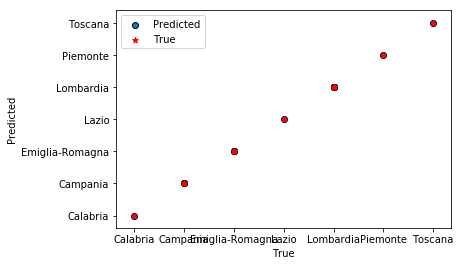

TRAIN: [ 0  1  3  4  5  6  8  9 10 11 13 14 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 53 54
 55 57 58 59 60 63 64 65 66 67 69 70 76]
TEST: [ 2  7 12 15 49 51 52 56 61 62 68 71 72 73 74 75]
accuracy_score:  0.75

    predicted A quale regione d'Italia appartieni?
0    Calabria                             Calabria
1    Campania                             Campania
2    Campania                             Campania
3    Campania                             Campania
4   Lombardia                            Lombardia
5   Lombardia                            Lombardia
6   Lombardia                            Lombardia
7    Piemonte                             Piemonte
8      Puglia                               Puglia
9     Sicilia                             Sardegna
10    Toscana                              Toscana
11  Lombardia                  Trentino-Alto Adige
12      Lazio                               Umbria
13      Lazio

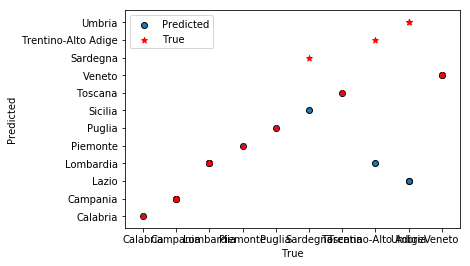

TRAIN: [ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 16 20 21 22 23 24 26 28 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52 53 54 55 56 57 58 59
 61 62 63 64 65 66 67 68 70 71 72 73 74 75]
TEST: [ 6 11 17 18 19 25 27 29 30 31 46 47 60 69 76]
accuracy_score:  1.0

          predicted A quale regione d'Italia appartieni?
0          Campania                             Campania
1          Campania                             Campania
2   Emiglia-Romagna                      Emiglia-Romagna
3   Emiglia-Romagna                      Emiglia-Romagna
4   Emiglia-Romagna                      Emiglia-Romagna
5             Lazio                                Lazio
6             Lazio                                Lazio
7         Lombardia                            Lombardia
8         Lombardia                            Lombardia
9         Lombardia                            Lombardia
10        Lombardia                            Lombardia
11        Lombardia                         

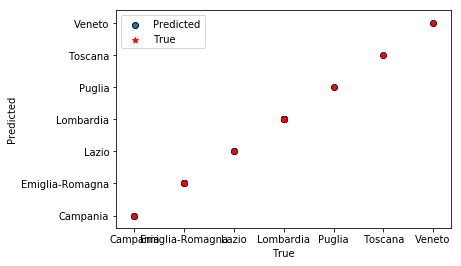

TRAIN: [ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 29 30 31 33 34 35 36 37 40 41 43 46 47 49 51 52 53 54 55 56 58 59 60
 61 62 64 65 67 68 69 70 71 72 73 74 75 76]
TEST: [ 0 10 22 28 32 38 39 42 44 45 48 50 57 63 66]
accuracy_score:  0.8666666666666667

    predicted A quale regione d'Italia appartieni?
0    Campania                              Abruzzo
1    Campania                             Campania
2       Lazio                                Lazio
3   Lombardia                            Lombardia
4   Lombardia                            Lombardia
5   Lombardia                            Lombardia
6   Lombardia                            Lombardia
7   Lombardia                            Lombardia
8   Lombardia                            Lombardia
9   Lombardia                            Lombardia
10  Lombardia                            Lombardia
11  Lombardia                            Lombardia
12   Piemonte                             Piemonte

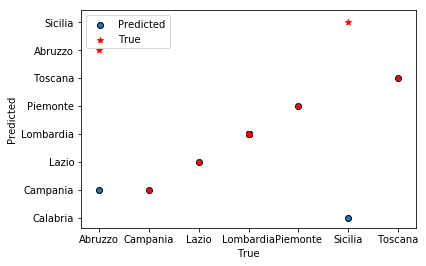

TRAIN: [ 0  1  2  5  6  7  8  9 10 11 12 15 16 17 18 19 20 21 22 24 25 27 28 29
 30 31 32 35 36 38 39 40 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 60 61 62 63 66 67 68 69 71 72 73 74 75 76]
TEST: [ 3  4 13 14 23 26 33 34 37 41 58 59 64 65 70]
accuracy_score:  0.8

    predicted A quale regione d'Italia appartieni?
0    Calabria                             Calabria
1    Campania                             Campania
2    Campania                             Campania
3    Campania                             Campania
4       Lazio                                Lazio
5       Lazio                                Lazio
6   Lombardia                            Lombardia
7   Lombardia                            Lombardia
8   Lombardia                            Lombardia
9   Lombardia                            Lombardia
10   Piemonte                             Piemonte
11   Campania                               Puglia
12   Calabria                              Sicilia
13  Lombardia 

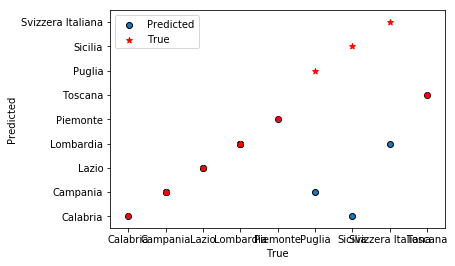




AVERAGE:  0.8833333333333334


In [19]:
total = 0
pred_scores = []
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train) 

    pred = clf.predict(X_test)

    score = accuracy_score(y_test, pred)

    print('accuracy_score: ', score)
    print()
    
    total += score
    pred_scores.append(score)
    
    pred = pd.Series(pred, name='predicted')
    compare = pd.concat([pred,y_test.reset_index()], axis=1).drop('index', axis=1)
    print(compare)
    
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, pred, edgecolors=(0,0,0), label='Predicted')
    ax.scatter(y_test, y_test, c='red',marker='*', label='True')
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    ax.legend()
    plt.figure(figsize=(50,35))
    plt.show()
    
print("\n\n\nAVERAGE: ", total/5)